In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
# Load the commodity price data
commodity_data = pd.read_csv('CornFutures_ZC_CBT.csv')
commodity_data = commodity_data.rename(columns={'Date': 'DATE'})
commodity_data = commodity_data.set_index('DATE')

# Load the weather data for different locations
weather_data_arg = pd.read_csv('Argentina_Weather.csv', index_col='DATE')
weather_data_bra = pd.read_csv('Brazil_Weather.csv', index_col='DATE')
weather_data_cal = pd.read_csv('California_Weather.csv', index_col='DATE')
weather_data_ill = pd.read_csv('Illinois_Weather.csv', index_col='DATE')
weather_data_iow = pd.read_csv('Iowa_Weather.csv', index_col='DATE')
weather_data_min = pd.read_csv('Minnesota_Weather.csv', index_col='DATE')
weather_data_neb = pd.read_csv('Nebraska_Weather.csv', index_col='DATE')

In [3]:
commodity_data

,Open,High,Low,Close,Adj Close,Volume
DATE,,,,,,
2018-01-02,351.25,354.00,350.50,353.25,353.25,150143
2018-01-03,353.00,354.75,352.25,353.00,353.00,138593
2018-01-04,353.00,353.50,350.25,351.00,351.00,179965
2018-01-05,350.75,352.25,350.25,351.25,351.25,143914
2018-01-08,350.75,351.50,346.75,347.25,347.25,274879
...,...,...,...,...,...,...
2022-12-23,659.50,667.75,659.25,666.25,666.25,94496
2022-12-27,669.00,675.75,667.25,674.75,674.75,123172
2022-12-28,673.25,683.50,672.75,682.75,682.75,122193


In [4]:
# Merge the commodity data and weather data into a single DataFrame
data_arg = pd.merge(commodity_data, weather_data_arg, on='DATE')
data_bra = pd.merge(commodity_data, weather_data_bra, on='DATE')
data_cal = pd.merge(commodity_data, weather_data_cal, on='DATE')
data_ill = pd.merge(commodity_data, weather_data_ill, on='DATE')
data_iow = pd.merge(commodity_data, weather_data_iow, on='DATE')
data_min = pd.merge(commodity_data, weather_data_min, on='DATE')
data_neb = pd.merge(commodity_data, weather_data_neb, on='DATE')

In [5]:
data_arg

,Open,High,Low,Close,Adj Close,Volume,Mean_Temp,Max_Temp,Min_Temp,Mean_Precip,Mean_WindSpeed
DATE,,,,,,,,,,,
2018-01-02,351.25,354.00,350.50,353.25,353.25,150143,22.109231,34.2,4.8,0.108906,7.169231
2018-01-03,353.00,354.75,352.25,353.00,353.00,138593,23.378462,38.7,4.0,0.030156,7.518462
2018-01-04,353.00,353.50,350.25,351.00,351.00,179965,25.525000,41.1,3.5,0.028889,9.192187
2018-01-05,350.75,352.25,350.25,351.25,351.25,143914,23.567692,42.0,5.8,0.126230,9.741538
2018-01-08,350.75,351.50,346.75,347.25,347.25,274879,25.449231,41.5,4.1,0.006885,7.047692
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,659.50,667.75,659.25,666.25,666.25,94496,22.800000,43.5,1.0,0.137912,9.341758
2022-12-27,669.00,675.75,667.25,674.75,674.75,123172,22.661798,36.7,2.7,0.023708,7.328090
2022-12-28,673.25,683.50,672.75,682.75,682.75,122193,22.579070,37.6,0.7,0.067294,7.233721


In [6]:
train_data_arg = data_arg[:'2022-12']
test_data_arg = data_arg['2022-12':]

train_data_bra = data_bra[:'2022-12']
test_data_bra = data_bra['2022-12':]

train_data_cal = data_cal[:'2022-12']
test_data_cal = data_cal['2022-12':]

train_data_ill = data_ill[:'2022-12']
test_data_ill = data_ill['2022-12':]

train_data_iow = data_iow[:'2022-12']
test_data_iow = data_iow['2022-12':]

train_data_min = data_min[:'2022-12']
test_data_min = data_min['2022-12':]

train_data_neb = data_neb[:'2022-12']
test_data_neb = data_neb['2022-12':]


In [7]:
test_data_arg.shape

(21, 11)

In [8]:
# For ARG
exog_train_arg = train_data_arg[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_arg = test_data_arg[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For BRA
exog_train_bra = train_data_bra[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_bra = test_data_bra[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For CAL
exog_train_cal = train_data_cal[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_cal = test_data_cal[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For ILL
exog_train_ill = train_data_ill[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_ill = test_data_ill[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For IOW
exog_train_iow = train_data_iow[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_iow = test_data_iow[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For MIN
exog_train_min = train_data_min[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_min = test_data_min[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For NEB
exog_train_neb = train_data_neb[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_neb = test_data_neb[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]


In [9]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [ ]:
order = (2,1,2)
# For ARG
model_arg = sm.tsa.ARIMA(train_data_arg['Close'], order=order, exog=exog_train_arg)
result_arg = model_arg.fit()

# For BRA
model_bra = sm.tsa.ARIMA(train_data_bra['Close'], order=order, exog=exog_train_bra)
result_bra = model_bra.fit()

# For CAL
model_cal = sm.tsa.ARIMA(train_data_cal['Close'], order=order, exog=exog_train_cal)
result_cal = model_cal.fit()

# For ILL
model_ill = sm.tsa.ARIMA(train_data_ill['Close'], order=order, exog=exog_train_ill)
result_ill = model_ill.fit()

# For IOW
model_iow = sm.tsa.ARIMA(train_data_iow['Close'], order=order, exog=exog_train_iow)
result_iow = model_iow.fit()

# For MIN
model_min = sm.tsa.ARIMA(train_data_min['Close'], order=order, exog=exog_train_min)
result_min = model_min.fit()

# For NEB
model_neb = sm.tsa.ARIMA(train_data_neb['Close'], order=order, exog=exog_train_neb)
result_neb = model_neb.fit()


In [11]:
import matplotlib.pyplot as plt
# For ARG
pred_arg = result_arg.forecast(steps=21, exog=exog_test_arg)
pred_arg = pd.DataFrame(pred_arg[0], index=test_data_arg.index, columns=['Predictions_ARG'])

# For BRA
pred_bra = result_bra.forecast(steps=21, exog=exog_test_bra)
pred_bra = pd.DataFrame(pred_bra[0], index=test_data_bra.index, columns=['Predictions_BRA'])

# For CAL
pred_cal = result_cal.forecast(steps=21, exog=exog_test_cal)
pred_cal = pd.DataFrame(pred_cal[0], index=test_data_cal.index, columns=['Predictions_CAL'])

# For ILL
pred_ill = result_ill.forecast(steps=21, exog=exog_test_ill)
pred_ill = pd.DataFrame(pred_ill[0], index=test_data_ill.index, columns=['Predictions_ILL'])

# For IOW
pred_iow = result_iow.forecast(steps=21, exog=exog_test_iow)
pred_iow = pd.DataFrame(pred_iow[0], index=test_data_iow.index, columns=['Predictions_IOW'])

# For MIN
pred_min = result_min.forecast(steps=21, exog=exog_test_min)
pred_min = pd.DataFrame(pred_min[0], index=test_data_min.index, columns=['Predictions_MIN'])

# For NEB
pred_neb = result_neb.forecast(steps=21, exog=exog_test_neb)
pred_neb = pd.DataFrame(pred_neb[0], index=test_data_neb.index, columns=['Predictions_NEB'])




                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1233
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -4544.199
Method:                       css-mle   S.D. of innovations              9.639
Date:                Wed, 05 Apr 2023   AIC                           9106.398
Time:                        15:11:21   BIC                           9152.453
Sample:                             1   HQIC                          9123.723
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.9154      1.416     -1.352      0.176      -4.691       0.860
Mean_Temp          0.0927      0.053      1.746      0.081      -0.011       0.197
Mean_Precip        2.4981      2.615

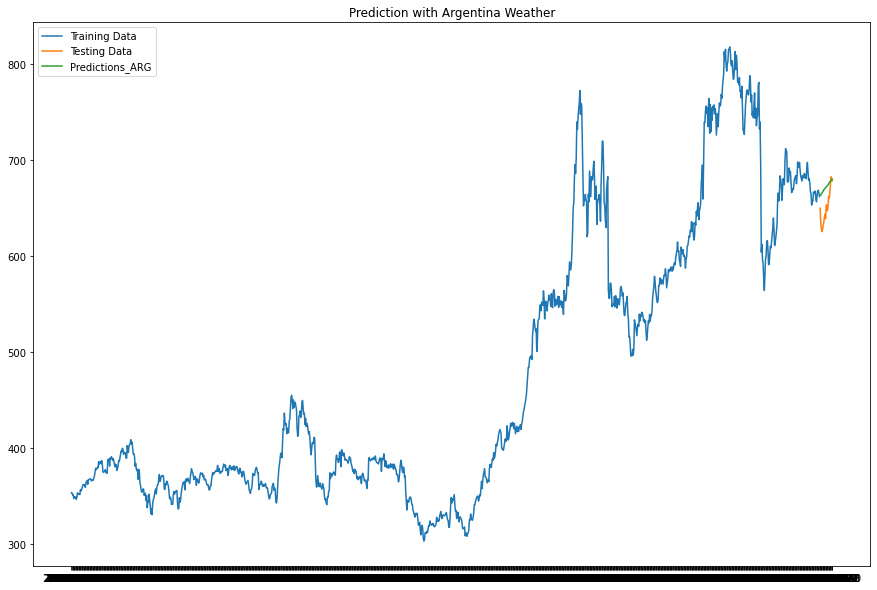

In [12]:
print(result_arg.summary())

# Plot the predicted values
plt.figure(figsize=(15, 10))

plt.plot(train_data_arg.index, train_data_arg['Close'], label='Training Data')
plt.plot(test_data_arg.index, test_data_arg['Close'], label='Testing Data')
plt.plot(pred_arg.index, pred_arg['Predictions_ARG'], label='Predictions_ARG')

plt.title('Prediction with Argentina Weather')
plt.legend(loc='best')
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1233
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -4545.090
Method:                       css-mle   S.D. of innovations              9.646
Date:                Wed, 05 Apr 2023   AIC                           9108.181
Time:                        15:11:32   BIC                           9154.236
Sample:                             1   HQIC                          9125.506
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -6.3883      3.788     -1.686      0.092     -13.813       1.037
Mean_Temp          0.2536      0.153      1.656      0.098      -0.047       0.554
Mean_Precip       17.4693     23.044

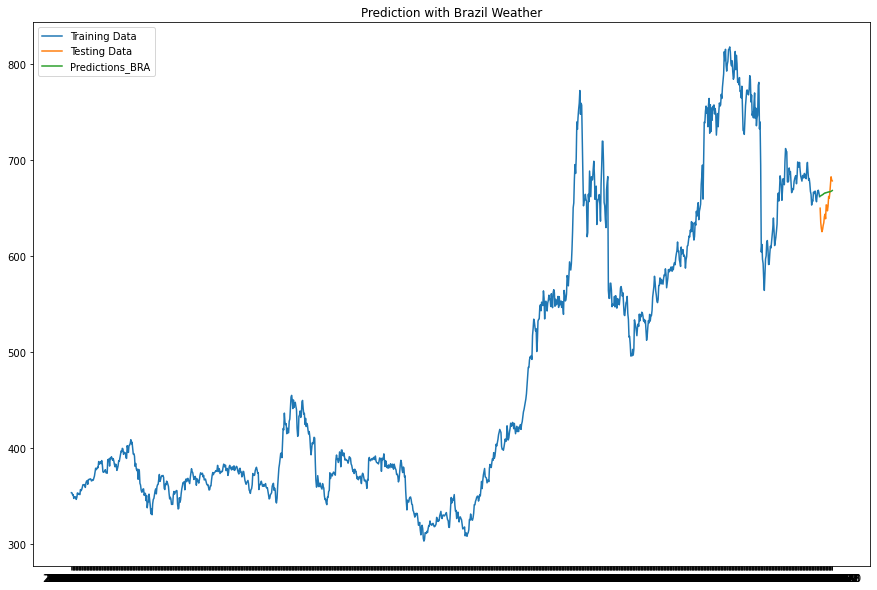

In [13]:
# Summary and plot for Brazil location
print(result_bra.summary())

plt.figure(figsize=(15, 10))

plt.plot(train_data_bra.index, train_data_bra['Close'], label='Training Data')
plt.plot(test_data_bra.index, test_data_bra['Close'], label='Testing Data')
plt.plot(pred_bra.index, pred_bra['Predictions_BRA'], label='Predictions_BRA')

plt.title('Prediction with Brazil Weather')
plt.legend(loc='best')
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1235
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -4550.418
Method:                       css-mle   S.D. of innovations              9.636
Date:                Wed, 05 Apr 2023   AIC                           9118.835
Time:                        15:11:43   BIC                           9164.905
Sample:                             1   HQIC                          9136.165
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.8805      1.272      1.478      0.139      -0.613       4.374
Mean_Temp         -0.0784      0.055     -1.428      0.153      -0.186       0.029
Mean_Precip       -0.1494      3.720

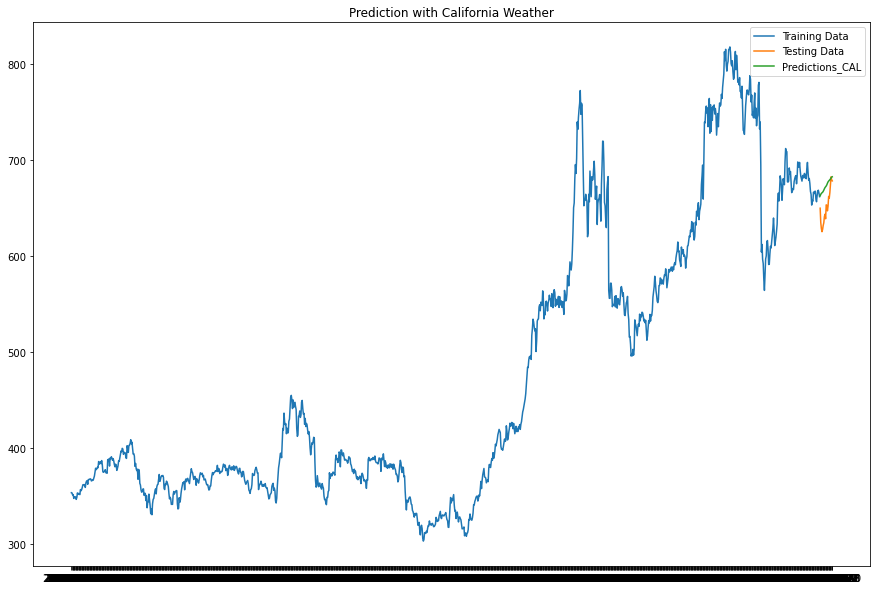

In [14]:
# Summary and plot for California location
print(result_cal.summary())

plt.figure(figsize=(15, 10))

plt.plot(train_data_cal.index, train_data_cal['Close'], label='Training Data')
plt.plot(test_data_cal.index, test_data_cal['Close'], label='Testing Data')
plt.plot(pred_cal.index, pred_cal['Predictions_CAL'], label='Predictions_CAL')

plt.title('Prediction with California Weather')
plt.legend(loc='best')
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1235
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -4549.028
Method:                       css-mle   S.D. of innovations              9.625
Date:                Wed, 05 Apr 2023   AIC                           9116.057
Time:                        15:11:53   BIC                           9162.126
Sample:                             1   HQIC                          9133.386
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.7991      0.877      0.911      0.362      -0.920       2.518
Mean_Temp         -0.0553      0.029     -1.896      0.058      -0.113       0.002
Mean_Precip        2.9205      1.880

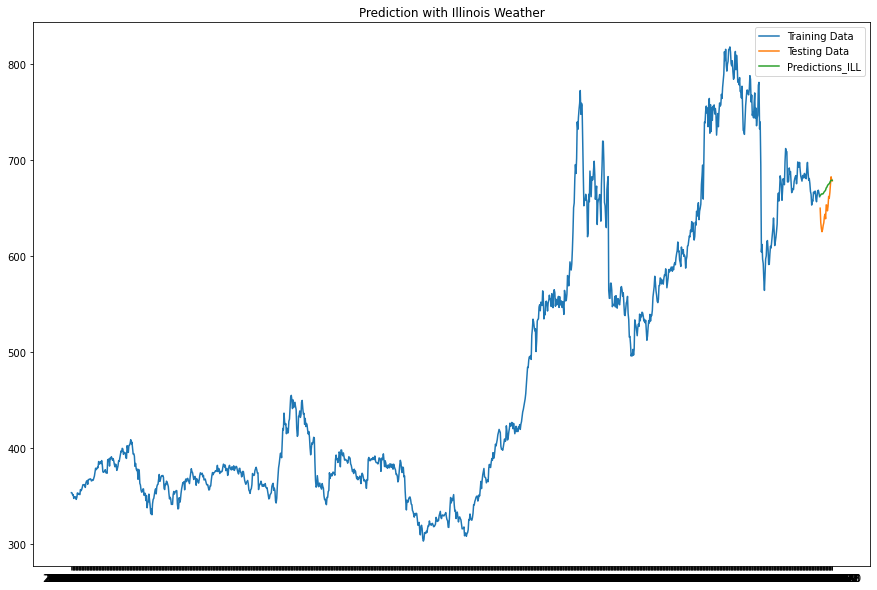

In [15]:
# Summary and plot for Illinois location
print(result_ill.summary())

plt.figure(figsize=(15, 10))

plt.plot(train_data_ill.index, train_data_ill['Close'], label='Training Data')
plt.plot(test_data_ill.index, test_data_ill['Close'], label='Testing Data')
plt.plot(pred_ill.index, pred_ill['Predictions_ILL'], label='Predictions_ILL')

plt.title('Prediction with Illinois Weather')
plt.legend(loc='best')
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1235
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -4549.311
Method:                       css-mle   S.D. of innovations              9.628
Date:                Wed, 05 Apr 2023   AIC                           9116.623
Time:                        15:12:02   BIC                           9162.692
Sample:                             1   HQIC                          9133.952
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.1070      0.852      1.299      0.194      -0.563       2.777
Mean_Temp         -0.0469      0.026     -1.828      0.068      -0.097       0.003
Mean_Precip       -1.6747      2.280

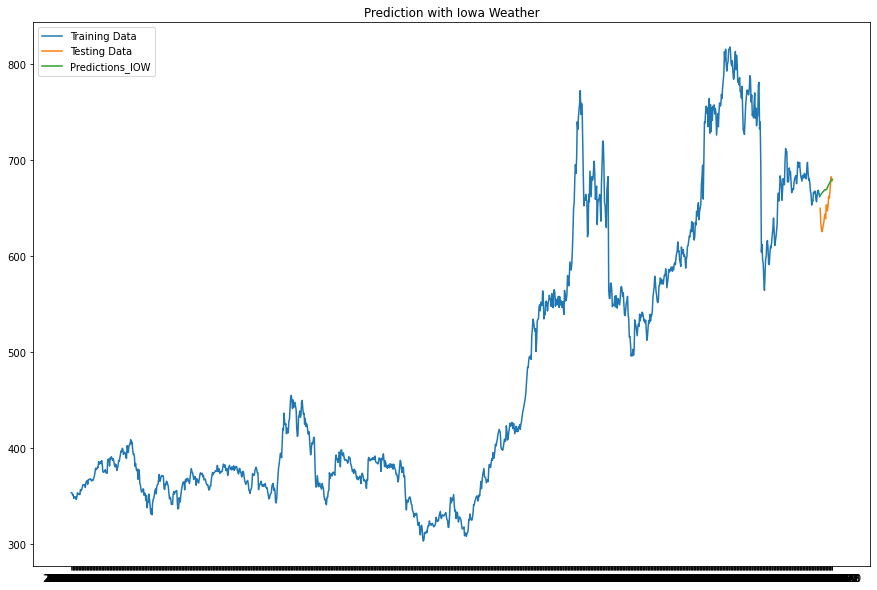

In [16]:
# Summary and plot for Iowa location
print(result_iow.summary())

plt.figure(figsize=(15, 10))

plt.plot(train_data_iow.index, train_data_iow['Close'], label='Training Data')
plt.plot(test_data_iow.index, test_data_iow['Close'], label='Testing Data')
plt.plot(pred_iow.index, pred_iow['Predictions_IOW'], label='Predictions_IOW')

plt.title('Prediction with Iowa Weather')
plt.legend(loc='best')
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1235
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -4548.985
Method:                       css-mle   S.D. of innovations              9.625
Date:                Wed, 05 Apr 2023   AIC                           9115.971
Time:                        15:12:11   BIC                           9162.040
Sample:                             1   HQIC                          9133.300
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5819      0.773      0.752      0.452      -0.934       2.098
Mean_Temp         -0.0538      0.024     -2.287      0.022      -0.100      -0.008
Mean_Precip        1.3280      2.789

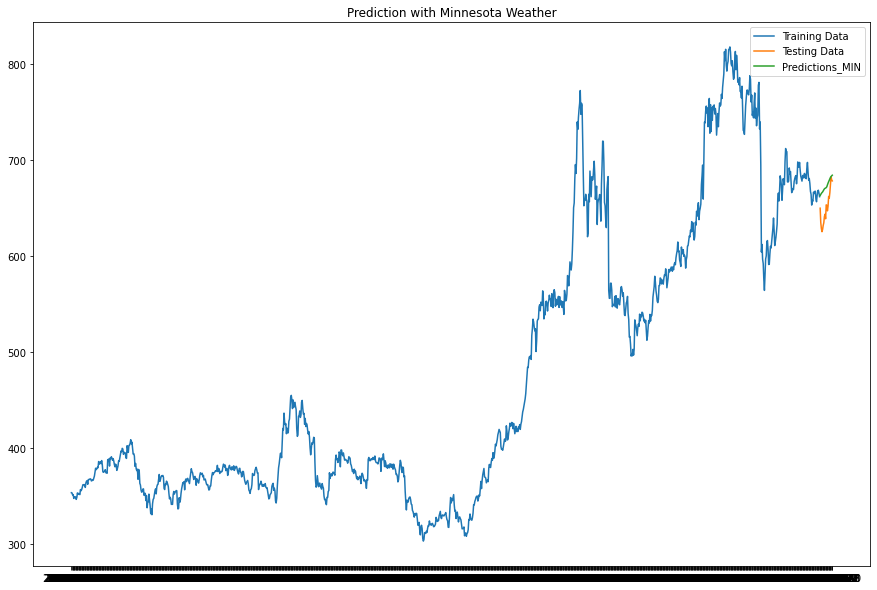

In [17]:
# Summary and plot for Minnesota location
print(result_min.summary())

plt.figure(figsize=(15, 10))

plt.plot(train_data_min.index, train_data_min['Close'], label='Training Data')
plt.plot(test_data_min.index, test_data_min['Close'], label='Testing Data')
plt.plot(pred_min.index, pred_min['Predictions_MIN'], label='Predictions_MIN')

plt.title('Prediction with Minnesota Weather')
plt.legend(loc='best')
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1235
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -4546.581
Method:                       css-mle   S.D. of innovations              9.607
Date:                Wed, 05 Apr 2023   AIC                           9111.161
Time:                        15:12:21   BIC                           9157.231
Sample:                             1   HQIC                          9128.491
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.9153      0.887      1.031      0.302      -0.824       2.655
Mean_Temp         -0.0497      0.025     -1.997      0.046      -0.099      -0.001
Mean_Precip       -1.5562      2.253

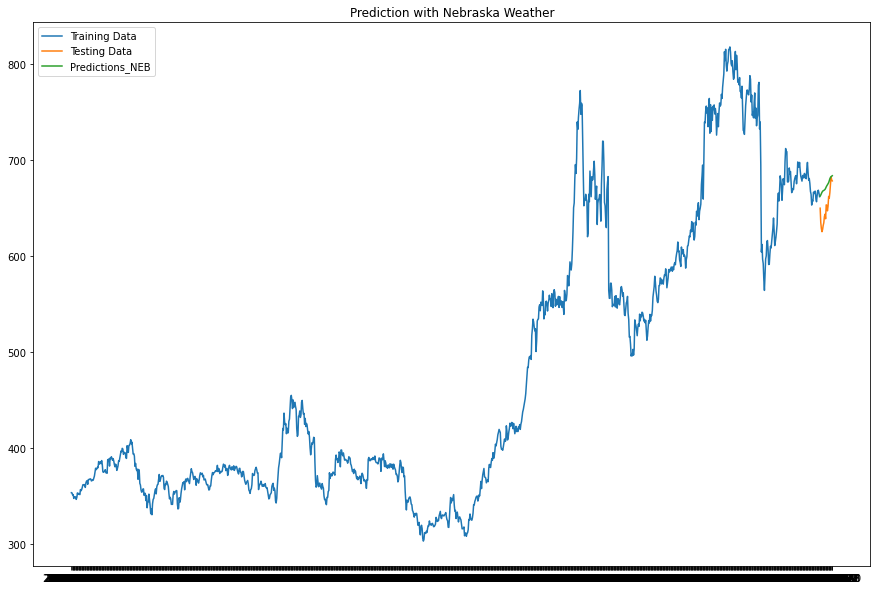

In [18]:
# Summary and plot for Nebraska location
print(result_neb.summary())

plt.figure(figsize=(15, 10))

plt.plot(train_data_neb.index, train_data_neb['Close'], label='Training Data')
plt.plot(test_data_neb.index, test_data_neb['Close'], label='Testing Data')
plt.plot(pred_neb.index, pred_neb['Predictions_NEB'], label='Predictions_NEB')

plt.title('Prediction with Nebraska Weather')
plt.legend(loc='best')
plt.show()

In [ ]:
# Concatenate weather data for all locations
exog_train_all = pd.concat([exog_train_arg.add_suffix('_arg'), exog_train_bra.add_suffix('_bra'), 
                            exog_train_cal.add_suffix('_cal'), exog_train_ill.add_suffix('_ill'), 
                            exog_train_iow.add_suffix('_iow'), exog_train_min.add_suffix('_min'), 
                            exog_train_neb.add_suffix('_neb')], axis=1)
exog_test_all = pd.concat([exog_test_arg, exog_test_bra, exog_test_cal, exog_test_ill, 
                           exog_test_iow, exog_test_min, exog_test_neb], axis=1)

exog_train_all.dropna(inplace=True)


# Fit the ARIMA model with exogenous variables
model = sm.tsa.ARIMA(train_data_arg['Close'], order=(2,1,2), exog=exog_train_all)

# Train the model
result = model.fit()

In [20]:
# Print the summary of the model
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1233
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -4535.819
Method:                       css-mle   S.D. of innovations              9.580
Date:                Wed, 05 Apr 2023   AIC                           9125.638
Time:                        15:12:58   BIC                           9263.803
Sample:                             1   HQIC                          9177.614
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.9599      6.420     -0.773      0.440     -17.542       7.622
Mean_Temp_arg          0.0882      0.115      0.765      0.444      -0.138       0.314
Mean_Precip_arg     

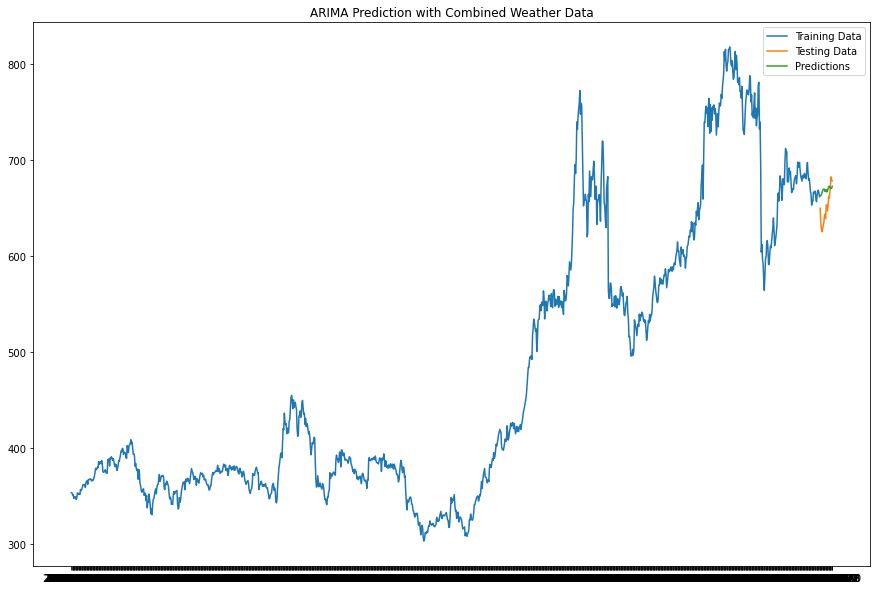

In [21]:
# Forecast
pred = result.forecast(steps=21, exog=exog_test_all)
pred = pd.DataFrame(pred[0], index=test_data_arg.index, columns=['Predictions_ALL'])

# Plot the predicted values and the confidence interval
plt.figure(figsize=(15, 10))
plt.plot(train_data_arg.index, train_data_arg['Close'], label='Training Data')
plt.plot(test_data_arg.index, test_data_arg['Close'], label='Testing Data')
plt.plot(pred.index, pred['Predictions_ALL'], label='Predictions')
plt.legend(loc='best')
plt.title('ARIMA Prediction with Combined Weather Data')
plt.show()